# Make a circuit and run it on the ideal Sampler

In [2]:
from qiskit import QuantumCircuit
from qiskit.primitives import Sampler as QiskitSampler
from qiskit.visualization import plot_histogram

In [3]:
from qiskit import IBMQ
# IBMQ.save_account('MY_API_TOKEN')  # put your api token here

C:\Users\akank\AppData\Local\Temp\ipykernel_17236\971637716.py:2: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account('68e9bff06c68ef172755c405dffd4adb57a2375d0cdbd7b7a2b97da800c0a4f34799f58a7d68131ecccd57eb5965398a43c4828ab23e51d5758588971d7d17bb')
C:\Users\akank\AppData\Local\Temp\ipykernel_17236\971637716.py:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'

In [4]:
# Create a sample circuit
circuit = QuantumCircuit(2,2) # 2 qubits and 2 classical bits
circuit.h(0) # add a Hadamard gate to qubit 0
circuit.cx(0, 1) # add a CNOT gate on the control qubit 0 and target qubit 1
circuit.measure([0,1], [0,1]) # map the measurements to classical bits

In [5]:
# run the circuie using sampler primitives
sampler = QiskitSampler()
job = sampler.run(circuit)
result = job.result()

In [6]:
# calculate the probability distribution
p = result.quasi_dists[0].binary_probabilities()
print("Probability Distribution:", p)

Probability Distribution: {'00': 0.4999999999999999, '11': 0.4999999999999999}


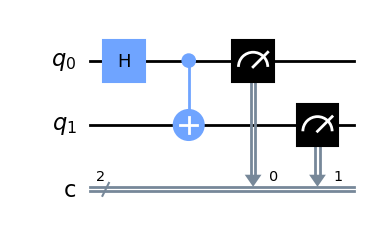

In [7]:
# draw the circuit
circuit.draw('mpl')

# Run it on a Real Device

In [8]:
# print all the available runtime services
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel='ibm_quantum')
service.backends()

[<IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('ibm_nairobi')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibm_lagos')>,
 <IBMBackend('ibm_perth')>,
 <IBMBackend('ibm_brisbane')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_statevector')>]

In [9]:
# find the least busy hardware with at least 2 qubits
backend = service.least_busy(min_num_qubits=2, simulator=False)
backend

<IBMBackend('ibm_nairobi')>

In [10]:
from qiskit_ibm_runtime import Session, Sampler, Options

# no error mitigation
options = Options(resilience_level=0) 

# choose your sampler and print the job id on running
with Session(service, backend=backend) as session:
    sampler = Sampler(session=session, options=options)
    job_real = sampler.run(circuit)
    print(f"Job ID: {job_real.job_id()}")

Job ID: cma5y70zs01g008zb39g


In [11]:
job_real.status()

<JobStatus.QUEUED: 'job is queued'>

In [12]:
from qiskit import Aer

In [13]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [14]:
simulator = Aer.get_backend('aer_simulator')

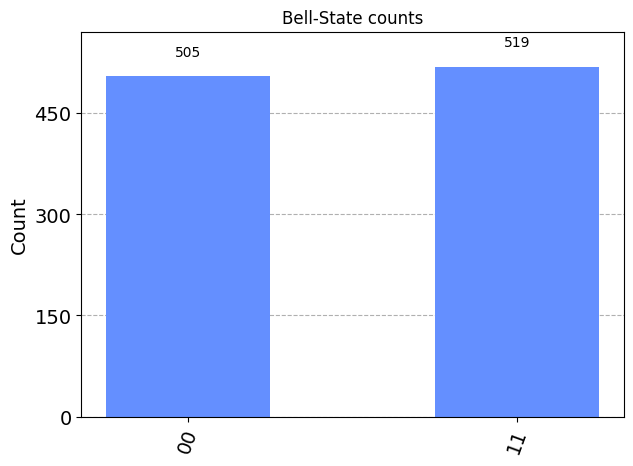

In [18]:
result = simulator.run(circuit).result()
counts = result.get_counts(circuit)
plot_histogram(counts, title='Bell-State counts')